### Notebook para tratamento do dataset e recorte e Teste da Segmentação

### Geracao dos diretórios necessários

In [1]:
import os


folders_paths = [
  "../data/base/",
  "../data/base_temporaria",
  "../data/base_recortada",
  "../data/base_mascara"
]


for each in folders_paths:
  if not os.path.exists(each):
    os.mkdir(each)
    print(f'Dirétorio criado: ({each})')
    


### Copiando o base para base_temporaria_teste

In [ ]:
raiz = "../data/base"
destino = "../data/base_temporaria"

import shutil

if ".png" in raiz:
    source_file = raiz  
    
    raiz_split = raiz.split("/") 
    
    destination_file = os.path.join(destino, raiz_split[(len(raiz_split)-1)])
    shutil.copy2(raiz, destination_file)
else:
  for i, each_file in enumerate(os.listdir(raiz)):

    source_file = os.path.join(raiz, each_file)
      
    destination_file = os.path.join(destino, each_file)
    print(i)
    
    if os.path.isfile(source_file):
          shutil.copy2(source_file, destination_file)
    


### Recorte da imagem

In [2]:
import numpy as np
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
diretorio_dataset = "../data/base_temporaria/"
diretorio_dataset_recortado = "../data/base_recortada/"
df = pd.read_csv("../data/classifications.csv")
value_expand = 90

In [202]:
# df = pd.read_csv("./data/classifications.csv")
# df = df[df["image_filename"] == "363b6b00d925e5c52694b8f7b678c53b.png"]
df = df[df["bethesda_system"] == "ASC-US"]

for each in df.iterrows():
  
  nome_img = each[1]['image_filename']
  nome_da_doenca = each[1]['bethesda_system']
  posi_x = each[1]['nucleus_x']
  posi_y = each[1]['nucleus_y']
  id_celular = each[1]['cell_id']  
  
  path_imagem_dataset_original = f'{diretorio_dataset}{nome_img}'
  print(path_imagem_dataset_original)
  
  # Onde ele vai ler cada imagem;
  img = cv2.imread(path_imagem_dataset_original)
  
  x1 = max(0, posi_x - value_expand)
  y1 = max(0, posi_y - value_expand)
  x2 = min(img.shape[1], posi_x + value_expand)
  y2 = min(img.shape[0], posi_y + value_expand)
  
  # Recortando a imagem;
  img_recortada = img[y1:y2,x1:x2]
  
  # Verifica se existe um folder no destino com o nome da doenca;
  if not os.path.exists(os.path.join(diretorio_dataset_recortado, nome_da_doenca)):
    os.mkdir(os.path.join(diretorio_dataset_recortado, nome_da_doenca))
    
  # Salva a imagem recortada no novo destino
  
  # print(len(img_recortada))
  
  
  
  if(len(img_recortada)!= 0):    
    try:
      cv2.imwrite(f'{diretorio_dataset_recortado}{nome_da_doenca}/' + f'{id_celular}.png', img_recortada)
    except:
      print(id_celular)
  # Limpar a variavel cv2
  cv2.destroyAllWindows()
  

../data/base_temporaria/0cc6e576dac3046d279bba515e10a7a9.png
../data/base_temporaria/0cc6e576dac3046d279bba515e10a7a9.png
../data/base_temporaria/6a642a0409ea6f1ffd234d666d6c9319.png
../data/base_temporaria/b5bc96650b0315465891547e78e4490c.png
../data/base_temporaria/b5bc96650b0315465891547e78e4490c.png
../data/base_temporaria/b5bc96650b0315465891547e78e4490c.png
../data/base_temporaria/b5bc96650b0315465891547e78e4490c.png
../data/base_temporaria/b5bc96650b0315465891547e78e4490c.png
../data/base_temporaria/b5bc96650b0315465891547e78e4490c.png
../data/base_temporaria/b5bc96650b0315465891547e78e4490c.png
../data/base_temporaria/b5bc96650b0315465891547e78e4490c.png
../data/base_temporaria/855ef72948b5ef0f051083d1cceca3f9.png
../data/base_temporaria/54562f3bda233bc849ce844c2d6d0809.png
../data/base_temporaria/54562f3bda233bc849ce844c2d6d0809.png
../data/base_temporaria/54562f3bda233bc849ce844c2d6d0809.png
../data/base_temporaria/6cdee50089fd0f8937732789776cd025.png
../data/base_temporaria/

In [4]:
def listar_imagens(diretorio_raiz, extensoes_imagens=None):
    if extensoes_imagens is None:
        extensoes_imagens = ['.jpg', '.jpeg', '.png']

    arquivos_imagens = []
    for dirpath, _, filenames in os.walk(diretorio_raiz):
        for filename in filenames:
            if any(filename.lower().endswith(extensao) for extensao in extensoes_imagens):
                caminho_completo = os.path.join(dirpath, filename)
                arquivos_imagens.append(caminho_completo)
    return arquivos_imagens
  
def exibir_imagens(lista_de_caminhos, largura=40, altura=25, path=True):
    num_imagens = len(lista_de_caminhos)
    
    if path:
    
      fig, axes = plt.subplots(1, num_imagens, figsize=(largura, altura))
    
      for i, caminho in enumerate(lista_de_caminhos):

          imagem = Image.open(caminho)
            
          axes[i].imshow(imagem)
          axes[i].axis('off')
          img = caminho.split("/")
          img = img[len(img)-1].replace("\\", " ").replace(".png", "")
          if "for" in img:
            img = img.replace("for intraepithelial lesion", "")
          axes[i].set_title(img)
      plt.show()
    else:
      
      # map_celula = {
      #   "title" : None,
      #   "img-inteira-title": None,
      #   "img-inteira-plotada" : None,
      #   "img" : None,
      #   "img-seg" : None,
      #   "img-mask" : None,
      # }
      fig, axes = plt.subplots(nrows=len(lista_de_caminhos), ncols=3, figsize=(largura, altura))
      plt.subplots_adjust(wspace=0.2)
      
      for i, each in enumerate(lista_de_caminhos):

          
          
          # Plotar imagem segmentada
          axes[i, 1].imshow(each["img-seg"])
          axes[i, 1].axis('off')
          if "for" in each["title"]:
            axes[i, 1].set_title(f'Segmentada  - {each["title"].replace("for intraepithelial lesion", "")}')
          else:
            axes[i, 1].set_title(f'Segmentada  - {each["title"]}')
              
          
          # Plotar original
          axes[i, 0].imshow(each["img"])
          axes[i, 0].axis('off')
          
          if "for" in each["title"]:
            
            axes[i, 0].set_title(f'Original - {each["title"].replace("for intraepithelial lesion", "")}')
          else:
            axes[i, 0].set_title(f'Original - {each["title"]}')
          # Plotar mask
          
          axes[i, 2].imshow(each["img-mask"])
          axes[i, 2].axis('off')
          if "for" in each["title"]:
            axes[i, 2].set_title(f'Mask - {each["title"].replace("for intraepithelial lesion", "")}')
          else:
            axes[i, 2].set_title(f'Mask - {each["title"]}')
            
      plt.show()

In [204]:
directory_path = '../data/base_recortada/'
images = listar_imagens(directory_path)
exibir_imagens(images)


Bibliotecas de Segmentação

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Inicio do Método de Remover Fundo (INPUT IMG INTEIRA)

In [ ]:
def remover_fundo_com_grabcut(imagem, x_central, y_central, tamanho_retangulo):
    mascara = np.zeros(imagem.shape[:2], np.uint8)
    backgroundModel = np.zeros((1, 65), np.float64)
    foregroundModel = np.zeros((1, 65), np.float64)
    altura, largura = imagem.shape[:2]
    
    x1 = max(0, x_central - tamanho_retangulo // 2)
    y1 = max(0, y_central - tamanho_retangulo // 2)
    x2 = min(largura, x_central + tamanho_retangulo // 2)
    y2 = min(altura, y_central + tamanho_retangulo // 2)
    
    rectangle = (x1, y1, x2 - x1, y2 - y1)
    
    cv2.grabCut(imagem, mascara, rectangle,  
            backgroundModel, foregroundModel,
            3, cv2.GC_INIT_WITH_RECT)
    
    mascara_objeto = np.where((mascara == 2) | (mascara == 0), 0, 1).astype('uint8')
    
    imagem_sem_fundo = imagem * mascara_objeto[:, :, np.newaxis]
    
    img_recortada = imagem_sem_fundo[y1:y2, x1:x2]
    
    imagem_gray = cv2.cvtColor(img_recortada, cv2.COLOR_BGR2GRAY)
    
    _, mascara = cv2.threshold(imagem_gray, 10, 255, cv2.THRESH_BINARY)
    
    img_original_recortada = imagem[y1:y2, x1:x2]
    
    return img_recortada, mascara, img_original_recortada

In [ ]:
def paint_quadrado_imagem_original(imagem, x_central, y_central, value_expand):
  x1 = max(0, x_central - value_expand // 2)
  y1 = max(0, y_central - value_expand // 2)
  x2 = min(imagem.shape[1], x_central + value_expand // 2)
  y2 = min(imagem.shape[0], y_central + value_expand // 2)

  imagem_com_quadrado = imagem.copy()
  cv2.rectangle(imagem_com_quadrado, (x1, y1), (x2, y2), (0, 255, 0), 2)  
  cv2.circle(imagem_com_quadrado, (x_central, y_central), 5, (0, 0, 255), -1) 

  imagem_com_quadrado_rgb = cv2.cvtColor(imagem_com_quadrado, cv2.COLOR_BGR2RGB)
  return imagem_com_quadrado_rgb

In [ ]:
def generateMapSegmentad(lista_map_celula, img_name, value_expand):
  # value_expand = 70
  df = pd.read_csv("../data/classifications.csv")
  df = df[df["image_filename"] == f"{img_name}.png"]
  database = "../data/base_temporaria/"

  map_celula = {
    "title" : None,
    "img-inteira-title": None,
    "img-inteira-plotada" : None,
    "img" : None,
    "img-seg" : None,
    "img-mask" : None,
  }

  

  for i, each in enumerate(df.iterrows()):
    
    
    nome_img = each[1]['image_filename']
    nome_da_doenca = each[1]['bethesda_system']
    posi_x = each[1]['nucleus_x']
    posi_y = each[1]['nucleus_y']
    id_celular = each[1]['cell_id']  
    
    path = "".join([database, nome_img])
    
    imagem = cv2.imread(path)
    imagem_sem_fundo, mask, img_original_recortada = remover_fundo_com_grabcut(imagem, posi_x, posi_y, value_expand)
    
    map_celula["img"] = img_original_recortada
    map_celula["title"] = f"{nome_da_doenca} - {id_celular}"
    map_celula["img-inteira-title"] = nome_img
    map_celula["img-seg"] = imagem_sem_fundo
    map_celula["img-mask"] = mask
    
    if i == 0:
      imagem_original_plotada = paint_quadrado_imagem_original(imagem, posi_x, posi_y, value_expand)
    else:
      imagem_original_plotada = paint_quadrado_imagem_original(imagem_original_plotada, posi_x, posi_y, value_expand)
    
    map_celula["img-inteira-plotada"] = imagem_original_plotada
    lista_map_celula.append(map_celula.copy())
    # print(i)
    print(nome_da_doenca +  " " + str(id_celular))
  return lista_map_celula
  

### Inicio do Método de Remover Fundo (INPUT IMG RECORTADA)

In [6]:
def remover_fundo_com_grabcut_recortado(imagem):
    mascara = np.zeros(imagem.shape[:2], np.uint8)
    backgroundModel = np.zeros((1, 65), np.float64)
    foregroundModel = np.zeros((1, 65), np.float64)
    altura, largura = imagem.shape[:2]
    
    # Calcular os limites do retângulo
    x1 = 0
    y1 = 0
    x2 = largura - 1
    y2 = altura - 1
        
    rectangle = (x1, y1, x2 - x1, y2 - y1)
    
    print(f"Valor do ratangulo: {rectangle}")
    
    cv2.grabCut(imagem, mascara, rectangle,  
            backgroundModel, foregroundModel,
            3, cv2.GC_INIT_WITH_RECT)
    
    mascara_objeto = np.where((mascara == 2) | (mascara == 0), 0, 1).astype('uint8')
    
    imagem_sem_fundo = imagem * mascara_objeto[:, :, np.newaxis]
    
    img_recortada = imagem_sem_fundo[y1:y2, x1:x2]
    
    imagem_gray = cv2.cvtColor(img_recortada, cv2.COLOR_BGR2GRAY)
    
    _, mascara = cv2.threshold(imagem_gray, 10, 255, cv2.THRESH_BINARY)
    
    img_original_recortada = imagem[y1:y2, x1:x2]
    
    return img_recortada, mascara, img_original_recortada

In [7]:
def paint_quadrado_imagem_recortado(imagem, x_central, y_central):
  altura, largura = imagem.shape[:2]
    
  # Calcular os limites do retângulo
  x1 = 0
  y1 = 0
  x2 = largura - 1
  y2 = altura - 1

  imagem_com_quadrado = imagem.copy()
  cv2.rectangle(imagem_com_quadrado, (x1, y1), (x2, y2), (0, 255, 0), 2)  
  cv2.circle(imagem_com_quadrado, (x_central, y_central), 5, (0, 0, 255), -1) 

  imagem_com_quadrado_rgb = cv2.cvtColor(imagem_com_quadrado, cv2.COLOR_BGR2RGB)
  return imagem_com_quadrado_rgb

In [8]:
def generateMapSegmentad_Recortada(lista_map_celula, info_img):
  # value_expand = 70
  df = pd.read_csv("../data/classifications.csv")
  # df = df[df["image_filename"] == f"{info_img}.png"]
  df = df[df["cell_id"] == int(info_img) ]

  print(df)
  print("AAAAAAAAAAAAAAAAAAAAA")
  print(int(info_img))
  print("--------------\n\n\n")
  map_celula = {
    "title" : None,
    "img-inteira-title": None,
    "img-inteira-plotada" : None,
    "img" : None,
    "img-seg" : None,
    "img-mask" : None,
  }

  

  for i, each in enumerate(df.iterrows()):
    
    print("BBBBBBBBBBBBBBBBBBBBBBBBB")    
    
    nome_img = each[1]['image_filename']
    nome_da_doenca = each[1]['bethesda_system']
    id_celular = each[1]['cell_id']  
    
    database = f"../data/base_recortada/{nome_da_doenca}/"
    
    try:
      
    
      path = "".join([database, str(id_celular)]) + ".png"
      print(path)
      imagem = cv2.imread(path)
      altura, largura = imagem.shape[:2]
      posi_x = largura // 2
      posi_y =  altura // 2
      imagem_sem_fundo, mask, img_original_recortada = remover_fundo_com_grabcut_recortado(imagem)
      
      map_celula["img"] = img_original_recortada
      map_celula["title"] = f"{nome_da_doenca} - {id_celular}"
      map_celula["img-inteira-title"] = nome_img
      map_celula["img-seg"] = imagem_sem_fundo
      map_celula["img-mask"] = mask
      
      if i == 0:
        imagem_original_plotada = paint_quadrado_imagem_recortado(imagem, posi_x, posi_y)
      else:
        imagem_original_plotada = paint_quadrado_imagem_recortado(imagem_original_plotada, posi_x, posi_y)
      
      map_celula["img-inteira-plotada"] = imagem_original_plotada
      lista_map_celula.append(map_celula.copy())
      # print(i)
      print(nome_da_doenca +  " " + str(id_celular))
    except:
      print(f"Deu erro: {database}")
  return lista_map_celula
  

In [ ]:
lista_map_celula = []
lista_map_celula_recortada = []

generateMapSegmentad_Recortada(lista_map_celula, "363b6b00d925e5c52694b8f7b678c53b")
generateMapSegmentad(lista_map_celula_recortada, "363b6b00d925e5c52694b8f7b678c53b", 70)

In [ ]:
exibir_imagens(lista_de_caminhos=lista_map_celula, largura=40, altura=25, path=False)

In [ ]:
exibir_imagens(lista_de_caminhos=lista_map_celula_recortada, largura=40, altura=25, path=False)

In [ ]:
plt.imshow(lista_map_celula[len(lista_map_celula)-1].get("img-inteira-plotada"))
plt.axis('off')
plt.show()

In [ ]:
lista_map_celula = []

lista_map_celula = generateMapSegmentad(lista_map_celula, "0a2a5a681410054941cc56f51eb8fbda", 100)

In [ ]:
exibir_imagens(lista_de_caminhos=lista_map_celula, largura=40, altura=25, path=False)

In [ ]:
plt.imshow(lista_map_celula[len(lista_map_celula)-1].get("img-inteira-plotada"))
plt.axis('off')
plt.show()

In [ ]:
lista_map_celula = []

lista_map_celula = generateMapSegmentad(lista_map_celula, "1c900ddde4d55e63c0d06c4854b29f89", 90)

In [ ]:
exibir_imagens(lista_de_caminhos=lista_map_celula, largura=40, altura=25, path=False)

In [ ]:
plt.imshow(lista_map_celula[len(lista_map_celula)-1].get("img-inteira-plotada"))
plt.axis('off')
plt.show()

### Gerando Dataset de Mascaras

In [ ]:
# map_celula = {
#   "title" : None,
#   "img-inteira-title": None,
#   "img-inteira-plotada" : None,
#   "img" : None,
#   "img-seg" : None,
#   "img-mask" : None,
# }

In [10]:
diretorio_dataset_recortado_mask = "../data/base_mascara/"

In [11]:
def listar_imagens(diretorio_raiz, extensoes_imagens=None):
    if extensoes_imagens is None:
        extensoes_imagens = ['.jpg', '.jpeg', '.png']

    arquivos_imagens = []
    for dirpath, _, filenames in os.walk(diretorio_raiz):
        for filename in filenames:
            if any(filename.lower().endswith(extensao) for extensao in extensoes_imagens):
                caminho_completo = os.path.join(dirpath, filename)
                arquivos_imagens.append(caminho_completo)
    return arquivos_imagens

In [12]:
path = '../data/base_recortada/'
img_path_list = []
img_path_list = listar_imagens(path)


for each_img in img_path_list:
  lista_map_celula = []
  
  # img_name = each_img.split("/")
  # img_name = img_name[len(img_name)-1].replace(".png", "")
  img_name = each_img.split('\\')
  img_name = img_name[len(img_name)-1].replace(".png", "")

  lista_map_celula = generateMapSegmentad_Recortada(lista_map_celula, img_name)
  
  for each_map in lista_map_celula:
    
    title = each_map["title"].split("-")
    id_celular = title[len(title)-1].strip()
    nome_da_doenca = title[0].strip()
    
    if(len(each_map["img-mask"])!= 0):    

      if not os.path.exists(os.path.join(diretorio_dataset_recortado_mask, nome_da_doenca)):
        os.mkdir(os.path.join(diretorio_dataset_recortado_mask, nome_da_doenca))
    
      try:
        cv2.imwrite(f'{diretorio_dataset_recortado_mask}{nome_da_doenca}/' + f'{id_celular}.png', each_map["img-mask"])
      except:
        print("Erro")
        print(each_map["title"])
      
      
  


  
  

    image_id                        image_filename  \
99       398  0cc6e576dac3046d279bba515e10a7a9.png   

                       image_doi  cell_id bethesda_system  nucleus_x  \
99  10.6084/m9.figshare.12230900      100          ASC-US       1118   

    nucleus_y  
99         31  
AAAAAAAAAAAAAAAAAAAAA
100
--------------



BBBBBBBBBBBBBBBBBBBBBBBBB
../data/base_recortada/ASC-US/100.png
Valor do ratangulo: (0, 0, 179, 120)
ASC-US 100
      image_id                        image_filename  \
1003       378  b7c9bdb02733f1e3d77ac191115c15f7.png   

                         image_doi  cell_id bethesda_system  nucleus_x  \
1003  10.6084/m9.figshare.12230816     1004          ASC-US        583   

      nucleus_y  
1003        567  
AAAAAAAAAAAAAAAAAAAAA
1004
--------------



BBBBBBBBBBBBBBBBBBBBBBBBB
../data/base_recortada/ASC-US/1004.png
Valor do ratangulo: (0, 0, 179, 179)
ASC-US 1004
       image_id                        image_filename  \
10140        42  45c237e071148a104c2770fbca5

### Analise das Mascaras

In [15]:
import math

In [ ]:
img = cv2.imread("../data/base_mascara/LSIL/8.png")

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


threshold = 50


pixel_preto = np.sum(gray_img < threshold)


altura, largura = img.shape[:2]

pixels_total = altura *largura



print(f"Quantidade de pixels pretos: {pixel_preto}")
print(f"Quantidade total de pixels: {pixels_total}")
print(f"Porcentagem do tons de preto: {math.ceil((pixel_preto/pixels_total)*100)}")

In [13]:
lista_path_mascara = listar_imagens("../data/base_mascara/")
len(lista_path_mascara)

606

In [16]:

lista_resultado = []

for each in lista_path_mascara:
  print(each)
  img = cv2.imread(each)
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  threshold = 50


  pixel_preto = np.sum(gray_img < threshold)


  altura, largura = img.shape[:2]

  pixels_total = altura *largura
  
  porcentagem = math.ceil((pixel_preto/pixels_total)*100)
  
  
  lista_resultado.append(porcentagem)
  
  

  
  

../data/base_mascara/ASC\100.png
../data/base_mascara/ASC\1004.png
../data/base_mascara/ASC\10141.png
../data/base_mascara/ASC\10169.png
../data/base_mascara/ASC\10170.png
../data/base_mascara/ASC\10171.png
../data/base_mascara/ASC\10172.png
../data/base_mascara/ASC\10188.png
../data/base_mascara/ASC\10189.png
../data/base_mascara/ASC\10190.png
../data/base_mascara/ASC\10191.png
../data/base_mascara/ASC\10206.png
../data/base_mascara/ASC\10207.png
../data/base_mascara/ASC\10208.png
../data/base_mascara/ASC\10211.png
../data/base_mascara/ASC\10212.png
../data/base_mascara/ASC\10213.png
../data/base_mascara/ASC\10214.png
../data/base_mascara/ASC\10215.png
../data/base_mascara/ASC\10350.png
../data/base_mascara/ASC\10364.png
../data/base_mascara/ASC\10366.png
../data/base_mascara/ASC\10367.png
../data/base_mascara/ASC\10370.png
../data/base_mascara/ASC\10371.png
../data/base_mascara/ASC\10372.png
../data/base_mascara/ASC\10373.png
../data/base_mascara/ASC\10374.png
../data/base_mascara/AS

In [17]:
len(lista_resultado)

606

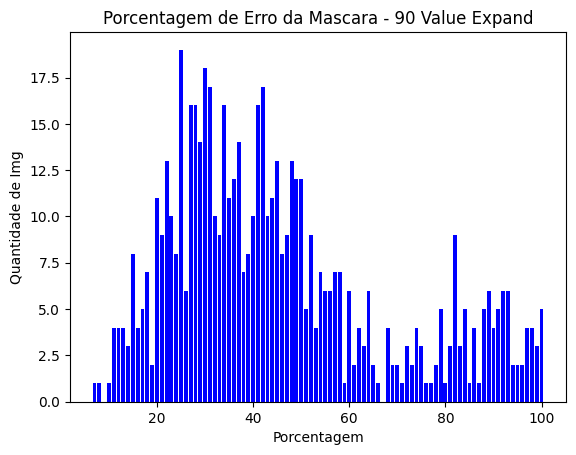

In [18]:
from collections import Counter

contagem = Counter(lista_resultado)

valores = list(contagem.keys())
frequencias = list(contagem.values())


plt.bar(valores, frequencias, color='blue')

plt.title("Porcentagem de Erro da Mascara - 90 Value Expand")
plt.xlabel("Porcentagem")
plt.ylabel("Quantidade de Img")

plt.show()

In [19]:
new_list = []

for freq, val in zip(frequencias, valores):
    print(f"A porcentagem {val} apareceu {freq} vezes")

A porcentagem 45 apareceu 13 vezes
A porcentagem 42 apareceu 17 vezes
A porcentagem 11 apareceu 4 vezes
A porcentagem 41 apareceu 16 vezes
A porcentagem 54 apareceu 7 vezes
A porcentagem 18 apareceu 7 vezes
A porcentagem 84 apareceu 5 vezes
A porcentagem 15 apareceu 8 vezes
A porcentagem 12 apareceu 4 vezes
A porcentagem 28 apareceu 16 vezes
A porcentagem 33 apareceu 9 vezes
A porcentagem 24 apareceu 8 vezes
A porcentagem 22 apareceu 13 vezes
A porcentagem 87 apareceu 1 vezes
A porcentagem 82 apareceu 9 vezes
A porcentagem 23 apareceu 10 vezes
A porcentagem 7 apareceu 1 vezes
A porcentagem 30 apareceu 18 vezes
A porcentagem 38 apareceu 7 vezes
A porcentagem 25 apareceu 19 vezes
A porcentagem 31 apareceu 17 vezes
A porcentagem 20 apareceu 11 vezes
A porcentagem 27 apareceu 16 vezes
A porcentagem 88 apareceu 5 vezes
A porcentagem 79 apareceu 5 vezes
A porcentagem 97 apareceu 4 vezes
A porcentagem 52 apareceu 9 vezes
A porcentagem 90 apareceu 4 vezes
A porcentagem 70 apareceu 2 vezes
A po

In [20]:
sum(frequencias), sum(valores)

(606, 4953)

In [21]:
frequencias_diferentes_100 = []
full_error = []
for freq, val in zip(frequencias, valores):
  if val != 100:
    frequencias_diferentes_100.append(freq)
  else:
    full_error.append(freq)

In [22]:
sum(frequencias_diferentes_100), sum(full_error)

(601, 5)

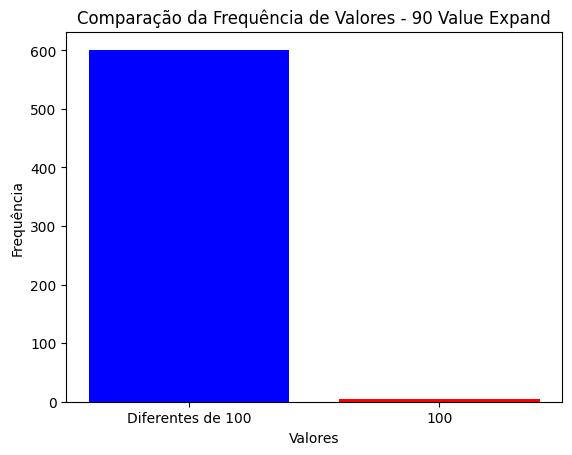

In [23]:


labels = ['Diferentes de 100', '100']

cores = ['blue', 'red']

soma_frequencias_diferentes_de_100 = sum(frequencias_diferentes_100)

frequencias = [soma_frequencias_diferentes_de_100, sum(full_error)]

# Posições das barras no eixo X
x = range(len(frequencias))

# Plotar o gráfico de barras
plt.bar(x, frequencias, color=cores)

# Adicionar título e rótulos
plt.title("Comparação da Frequência de Valores - 90 Value Expand")
plt.xlabel("Valores")
plt.ylabel("Frequência")

plt.xticks(x, labels)

plt.show()